<img src="https://www.freeiconspng.com/uploads/bike-png-hd-picture-3.png" />

# **Análise de Dados Exploratória**
#### **Contexto**
Uma empresa de aluguel de bicicletas da Coréia do Sul tem o interesse de prever a quantidade de alugueis de bicicletas por hora na capital do país, Seul. Com esse objetivo, esta empresa entrou em contato com a nossa empresa, de consultoria em ciência de dados, para a elaboração deste projeto.

Inicialmente, a empresa nos disponibilizou um arquivo **.csv** contendo a quantidade total de alugueis de bicicletas por hora, mas futuramente ela nos disponibilizará uma API, que será atualizada de hora em hora, com esses dados.

Um grupo de analistas de dados da nossa consultoria realizou uma pesquisa inicial de potenciais variáveis que possam ter correlação com a quantidade total de algueis por hora na cidade. Com base nisso, temos à disposição as seguintes variáveis:

|Variável|Descrição da Variável|Tipo da Variável|
|:-|:-|:-|
|Data|Data do aluguel|Data|
|Quantidade de Bicicletas Alugadas|Representa a quantidade total de bicicletas alugadas na hora de referência|Inteiro|
|Hora|Hora do aluguel|Inteiro|
|Temperatura|Temperatura, em $\small °C$|Contínuo|
|Umidade|Umidade relativa do ar, em $\small \%$|Inteiro|
|Velocidade do Vento|Velocidade do vento, em $\small m/s$|Contínuo|
|Visibilidade|Distância na qual seja capaz de discernir um objeto, em $\small 10\space m$|Inteiro|
|Temperatura de Ponto de Orvalho|Temperatura a que o ar deve ser resfriado para atingir 100% de umidade relativa|Contínuo|
|Radiação Solar|Índice de radiação solar, em $\small MJ/m^2$|Contínuo|
|Volume de Chuva|Volume de chuva, em $mm$|Inteiro|
|Volume de Neve|Volume de neve, em $cm$|Inteiro|
|Estação do Ano|Estação do ano na data do aluguel|Categórica|
|Feriado|Indica se é feriado ou não na data do aluguel|Binária|
|Dia Útil|Indica se é dia útil ou não na data do aluguel|Binária|

#### **Objetivo**

O objetivo desta análise de dados exploratória é o de identificar, por meio de diversos métodos, correlações entre as variáveis *feature* com a variável *target*, além de conseguir mais informações a respeito dos dados.

## **Pacotes**

In [2]:
from funcoes import plot_serie_temporal_padronizado
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import os

## **Carregando os dados e traduzindo o nome das colunas**

In [3]:
# CARREGANDO OS DADOS
df = pd.read_csv(os.getcwd() + '\\data\\seoul_bike_data.csv', sep = ',', encoding = 'unicode_escape')

# TRADUZINDO O NOME DAS COLUNAS
df.columns = [
    'data',
    'qtde_bicicletas_alugadas',
    'hora',
    'temperatura',
    'umidade',
    'velocidade_do_vento',
    'visibilidade',
    'temperatura_ponto_de_orvalho',
    'radiacao_solar',
    'volume_de_chuva',
    'volume_de_neve',
    'estacao_do_ano',
    'feriado',
    'dia_util'
]

## **Pré Processamento dos Dados**

In [26]:
# TRANSFORMANDO OS DADOS DE DATA EM DATETIME
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')

# CRIANDO UMA COLUNA SÓ COM O MÊS E O ANO
df['ano_e_mes'] = pd.to_datetime(df['data'], format = '%Y-%m')

# CRIANDO UMA COLUNA COM A DATA INCLUINDO A HORA
df['data_com_hora'] = np.nan
lista_data_com_hora = []
for i in df.index:
    ano = df.loc[i, 'data'].year
    mes = df.loc[i, 'data'].month
    dia = df.loc[i, 'data'].day
    hora = df.loc[i, 'hora']
    lista_data_com_hora.append(datetime(ano, mes, dia, hora))
df['data_com_hora'] = lista_data_com_hora

# CRIANDO UMA COLUNA COM O DIA DA SEMANA
df['dia_da_semana'] = df['data'].apply(lambda data: data.weekday())

# TRANSFORMANDO OS DIAS DA SEMANA DE NÚMERO PARA NOME
dicionario_dia_semana = {
    0: 'segunda',
    1: 'terça',
    2: 'quarta',
    3: 'quinta',
    4: 'sexta',
    5: 'sabado',
    6: 'domingo'
}
df['dia_da_semana'] = df['dia_da_semana'].map(dicionario_dia_semana)

# TRADUZINDO O NOME DAS ESTAÇÕES DO ANO PARA PORTUGUÊS
dicionario_estacao_do_ano = {
    'Summer': 'verao',
    'Spring': 'primavera',
    'Autumn': 'outono',
    'Winter': 'inverno'
}
df['estacao_do_ano'] = df['estacao_do_ano'].map(dicionario_estacao_do_ano)

# CRIANDO UMA LISTA COM AS VARIÁVEIS NUMERICAS E REMOVENDO VARIÁVEIS QUE NÃO SÃO NECESSÁRIAS
variaveis_numericas = df.select_dtypes(include = ['int', 'float']).columns.to_list()
variaveis_numericas = [nome_coluna for nome_coluna in variaveis_numericas if nome_coluna not in ['hora']]

# CRIANDO UMA LISTA COM AS VARIÁVEIS CATEGÓRICAS
variaves_categoricas = df.select_dtypes(include = ['object']).columns.to_list()

## **Análise**

### **Estatísticas das Variáveis**

In [ ]:
# VERIFICANDO O TIPO DAS VARIÁVEIS E SE HÁ VALORES NULOS
df.info()

# ANALISANDO ESTATÍSTICAS BÁSICAS SOBRE AS VARIÁVEIS COMO MÉDIA, MIN, MÁX, QUANTIS ETC.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   data                          8760 non-null   datetime64[ns]
 1   qtde_bicicletas_alugadas      8760 non-null   int64         
 2   hora                          8760 non-null   int64         
 3   temperatura                   8760 non-null   float64       
 4   umidade                       8760 non-null   int64         
 5   velocidade_do_vento           8760 non-null   float64       
 6   visibilidade                  8760 non-null   int64         
 7   temperatura_ponto_de_orvalho  8760 non-null   float64       
 8   radiacao_solar                8760 non-null   float64       
 9   volume_de_chuva               8760 non-null   float64       
 10  volume_de_neve                8760 non-null   float64       
 11  estacao_do_ano                

,data,qtde_bicicletas_alugadas,hora,temperatura,umidade,velocidade_do_vento,visibilidade,temperatura_ponto_de_orvalho,radiacao_solar,volume_de_chuva,volume_de_neve,ano_e_mes,data_com_hora
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-05-31 23:59:59.999999744,2018-06-01 11:30:00
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00,2017-12-01 00:00:00
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-02 00:00:00,2018-03-02 05:45:00
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 00:00:00,2018-06-01 11:30:00
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-31 00:00:00,2018-08-31 17:15:00
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018-11-30 00:00:00,2018-11-30 23:00:00
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN


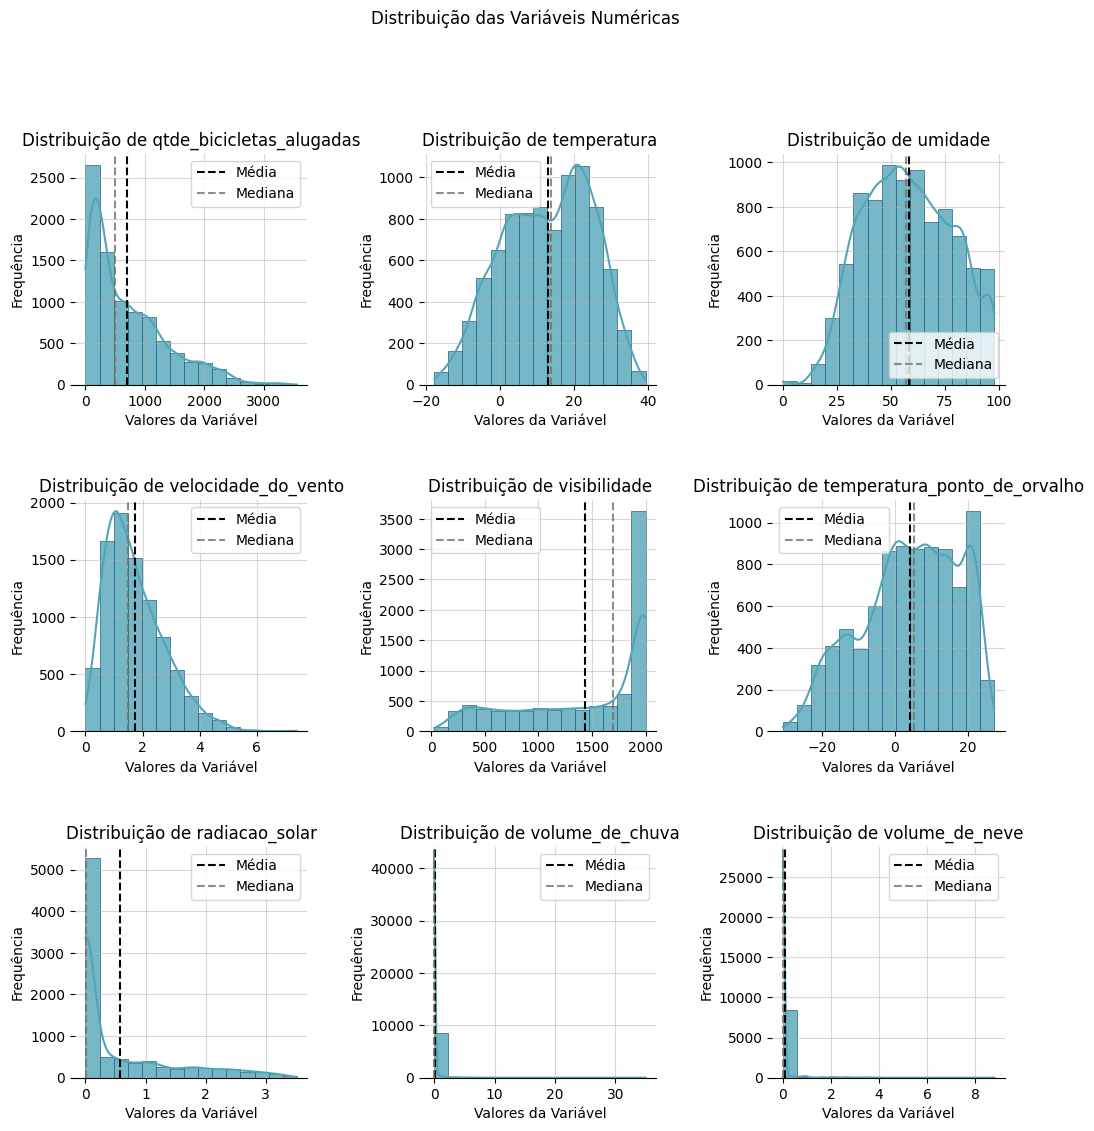

In [ ]:
# PALETA DE CORES
paleta = sns.color_palette("YlGnBu_d")

# CRIANDO O GRÁFICO
plt.figure(figsize = (12,12))
plt.suptitle('Distribuição das Variáveis Numéricas', y = 1 , fontsize = 12)

for i, q in enumerate(variaveis_numericas, 1):
    plt.subplot(3,3, i)
    media = df[q].mean()
    mediana = df[q].median()
    sns.histplot(df[q], kde = True, color = paleta[1], edgecolor = paleta[4], linewidth = 0.5, alpha = 0.8, stat='count', bins=15)
    sns.despine(left = True)
    plt.ylabel("Frequência")
    plt.xlabel('Valores da Variável')
    plt.axvline(x = media, color = 'black', linestyle = '--', label = 'Média')
    plt.axvline(x = mediana, color = '#747264', linestyle = '--', label = 'Mediana', alpha = 0.8)
    plt.grid(True, alpha = 0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.show()

In [ ]:
df.describe()

,data,qtde_bicicletas_alugadas,hora,temperatura,umidade,velocidade_do_vento,visibilidade,temperatura_ponto_de_orvalho,radiacao_solar,volume_de_chuva,volume_de_neve,data_com_hora,dia_da_semana
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2018-06-01 11:30:00,3.002740
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017-12-01 00:00:00,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018-03-02 05:45:00,1.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018-06-01 11:30:00,3.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018-08-31 17:15:00,5.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018-11-30 23:00:00,6.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,1.998056


<Axes: xlabel='volume_de_neve', ylabel='qtde_bicicletas_alugadas'>

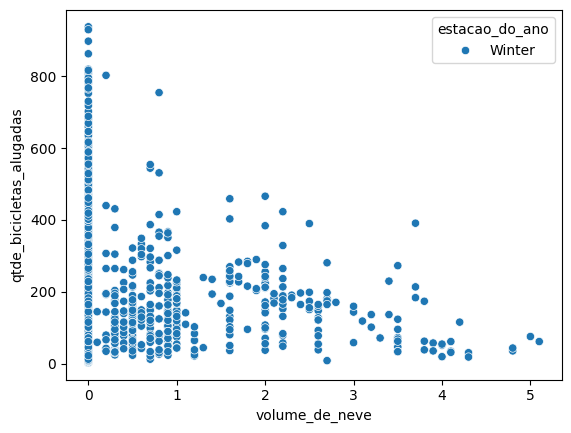

In [50]:
sns.scatterplot(df[df['estacao_do_ano'] == 'Winter'],
             x = 'volume_de_neve',
             y = 'qtde_bicicletas_alugadas',
             hue = 'estacao_do_ano')

### **Analisando a Série Temporal**

##### **PLOT 1: QUANTIDADE ALUGADA DE BICICLETAS POR HORA E POR DIA NO MÊS**

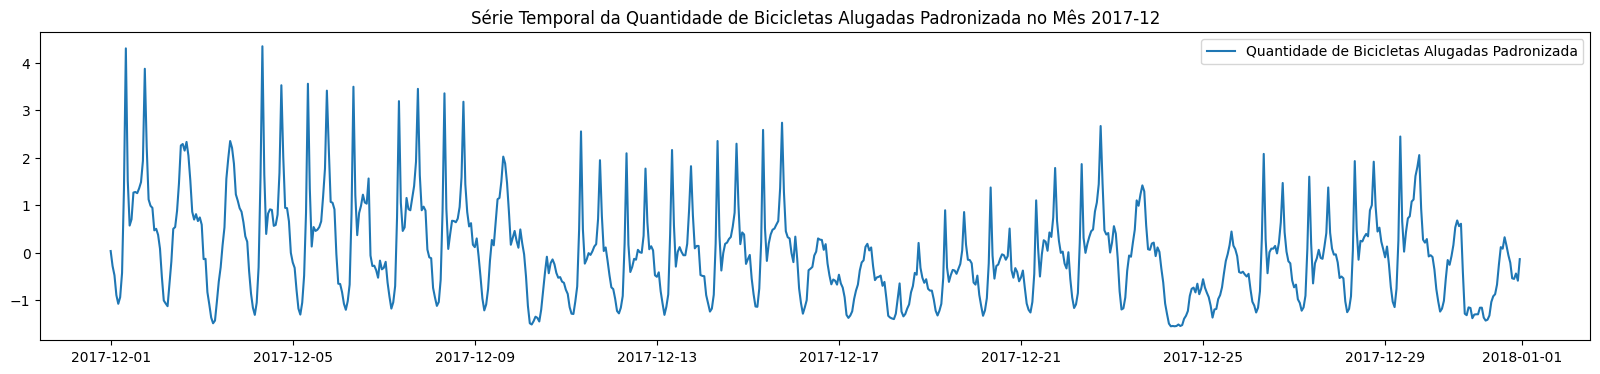

In [5]:
# CRIANDO O FILTRO
ano_e_mes = '2017-12'
filtro = df['ano_e_mes'] == ano_e_mes

# CRIANDO AS LISTAS
lista_data = df[filtro]['data_com_hora']
lista_bicicletas_alugadas = df[filtro]['qtde_bicicletas_alugadas']

# PLOTANDO O GRÁFICO DE SÉRIE TEMPORAL PADRONIZADO
plot_serie_temporal_padronizado(lista_x = lista_data,
                                lista_y_1 = lista_bicicletas_alugadas,
                                nome_1 = 'Quantidade de Bicicletas Alugadas Padronizada',
                                titulo_grafico = f'Série Temporal da Quantidade de Bicicletas Alugadas Padronizada no Mês {ano_e_mes}',
                                grafico_largura = 20,
                                grafico_altura = 4)

Analisando a quantidade de bicicletas alugadas por hora ao longo do mês, vemos que a série possui uma sazonalidade, mas que ainda não é possível identificar com clareza a sua periodicidade.

Utilizando o meu conhecimento prévio sobre a utilização de bicicletas alugadas no dia-a-dia, acredito que o dia da semana possa influenciar neste número. Logo, por conta disso, seria interessante fazermos uma análise no período de uma semana.

##### **PLOT 2: QUANTIDADE ALUGADA DE BICICLETAS POR HORA E POR DIA NA SEMANA**

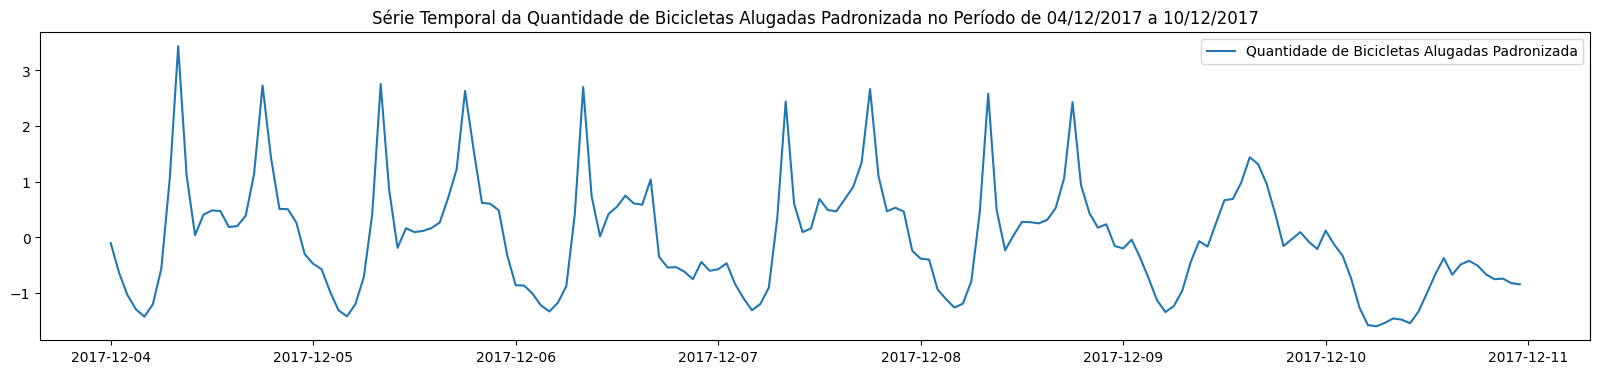

In [6]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 4)
data_fim = datetime(year = 2017, month = 12, day = 10)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO AS LISTAS
lista_data = df[filtro]['data_com_hora']
lista_bicicletas_alugadas = df[filtro]['qtde_bicicletas_alugadas']

# PLOTANDO O GRÁFICO DE SÉRIE TEMPORAL PADRONIZADO
plot_serie_temporal_padronizado(lista_x = lista_data,
                                lista_y_1 = lista_bicicletas_alugadas,
                                nome_1 = 'Quantidade de Bicicletas Alugadas Padronizada',
                                titulo_grafico = f'Série Temporal da Quantidade de Bicicletas Alugadas Padronizada no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}',
                                grafico_largura = 20,
                                grafico_altura = 4)

Sabendo que o dia 04/12/2017 foi uma segunda-feira e o dia 10/12/2017 foi um domingo, é possível observar que os dias de semana (segunda a sexta) são os dias com maiores quantidades de bicicletas alugadas, sendo os finais de semana (sábado e domingo) os dias com menor quantidade de bicicletas alugadas.

Podemos ver também que nos dias de semana acontecem dois picos por dia. Esses picos muito provavelmente são um horário de manhã, quando pessoas utilizam bicicletas alugadas para ir ao trabalho (pode ser faculdade ou escola também), e um à tarde ou à noite (quando voltam para casa). Em uma análise rápida, constatei que esses horários de pico são 09h e 19h.

Em relação à periodicidade da sazonalidade constatada, pode-se observar que ela é de 24 horas (1 dia) nesta série temporal. É possível que esta série temporal também possua uma sazonalidade de 7 dias, por conta da redução da quantidade de bicicletas alugadas aos finais de semana. Para verificar esta hipótese, faremos um gráfico agrupando todas as quantidades de bicicletas alugadas em um dia.

##### **PLOT 3: QUANTIDADE ALUGADA DE BICICLETAS POR DIA NA SEMANA**

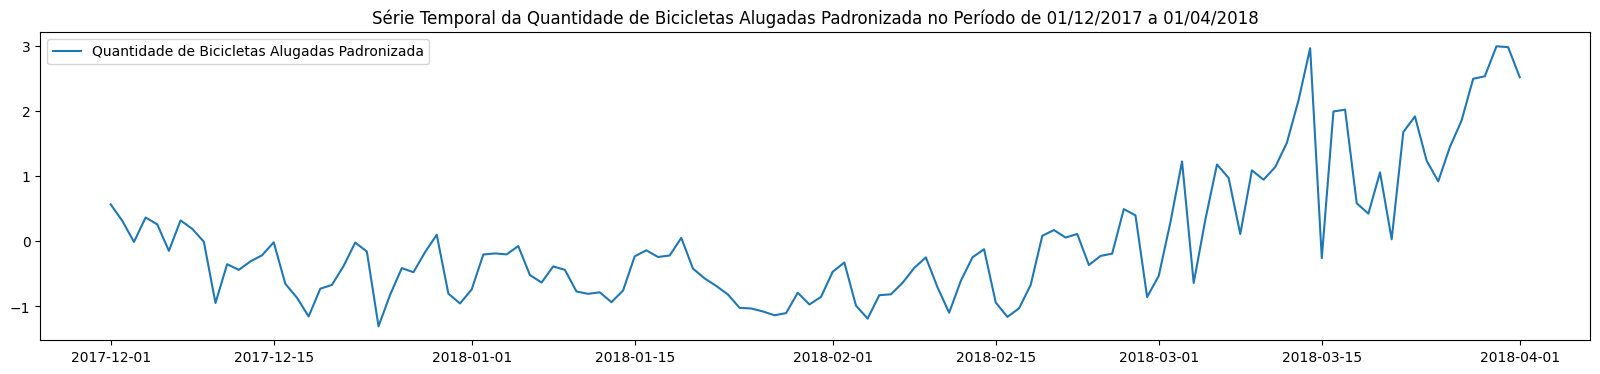

In [7]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 1)
data_fim = datetime(year = 2018, month = 4, day = 1)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO AS LISTAS
lista_data = df[filtro][['data', 'qtde_bicicletas_alugadas']].groupby(['data'], as_index = False).sum()['data']
lista_bicicletas_alugadas = df[filtro][['data', 'qtde_bicicletas_alugadas']].groupby(['data'], as_index = False).sum()['qtde_bicicletas_alugadas']

# PLOTANDO O GRÁFICO DE SÉRIE TEMPORAL PADRONIZADO
plot_serie_temporal_padronizado(lista_x = lista_data,
                                lista_y_1 = lista_bicicletas_alugadas,
                                nome_1 = 'Quantidade de Bicicletas Alugadas Padronizada',
                                titulo_grafico = f'Série Temporal da Quantidade de Bicicletas Alugadas Padronizada no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}',
                                grafico_largura = 20,
                                grafico_altura = 4)

Analisando a série temporal por dia em um período de 4 meses, não parece que ela tenha uma sazonalidade semanal. Podemos concluir nesta análise inicial da série temporal que ela possui sazonalidade de 1 dia.

### **Analisando as Variáveis** ***Feature***

##### **PLOT 4: TEMPERATURA x QUANTIDADE DE BICICLETAS ALUGADAS**

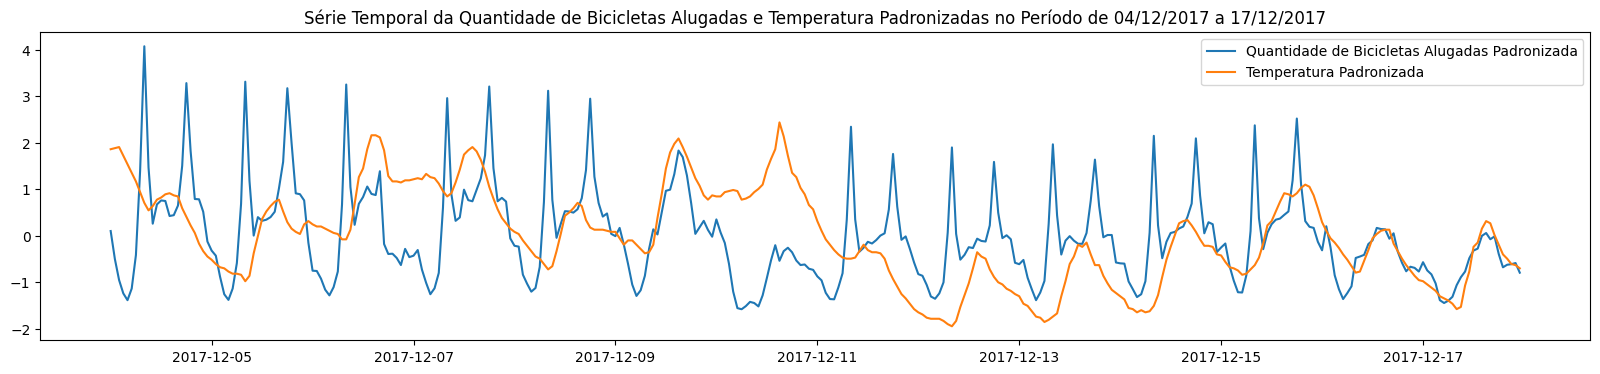

In [8]:
# CRIANDO O FILTRO
data_inicio = datetime(year = 2017, month = 12, day = 4)
data_fim = datetime(year = 2017, month = 12, day = 17)
filtro = (df['data'] >= data_inicio) & (df['data'] <= data_fim)

# CRIANDO AS LISTAS
lista_data = df[filtro]['data_com_hora']
lista_bicicletas_alugadas = df[filtro]['qtde_bicicletas_alugadas']
lista_temperatura = df[filtro]['temperatura']

# PLOTANDO O GRÁFICO DE SÉRIE TEMPORAL PADRONIZADO
plot_serie_temporal_padronizado(lista_x = lista_data,
                                lista_y_1 = lista_bicicletas_alugadas,
                                lista_y_2 = lista_temperatura,
                                nome_1 = 'Quantidade de Bicicletas Alugadas Padronizada',
                                nome_2 = 'Temperatura Padronizada',
                                titulo_grafico = f'Série Temporal da Quantidade de Bicicletas Alugadas e Temperatura Padronizadas no Período de {data_inicio.strftime("%d/%m/%Y")} a {data_fim.strftime("%d/%m/%Y")}',
                                grafico_largura = 20,
                                grafico_altura = 4)